In [1]:
import ir_text
from time import time

In [2]:
from os import listdir
from os.path import join

path = join('data', 'datasets')
datasets = list(dict.fromkeys([file.split('_')[0] for file in listdir(path)]))

dataset = datasets[5]
print('Available datasets :', datasets)
print('Current dataset :', dataset)

data_path = join(path, dataset + '_dataset.json')
queries_path = join(path, dataset + '_queries.json')
groundtruth_path = join(path, dataset + '_groundtruth.json')

Available datasets : ['cran', 'time', 'cisi', 'lisa', 'cacm', 'med']
Current dataset : med


In [3]:
import json

with open(data_path, 'r') as json_data:
    data = json.load(json_data)
print('Data length :', len(data['dataset']))

with open(queries_path, 'r') as json_queries:
    queries = json.load(json_queries)
print('Queries length :', len(queries['queries']))

with open(groundtruth_path, 'r') as json_groundtruth:
    groundtruth = json.load(json_groundtruth)
print('Ground truth length :', len(groundtruth['groundtruth']))

Data length : 1033
Queries length : 30
Ground truth length : 30


## Linear Index

### Construct

In [4]:
linear_index = ir_text.LinearIndex(data['dataset'], language = 'english')

start = time()
linear_index.construct()
print("Constructed in", round(time() - start, 3), 's')

Constructed in 2.423 s


### Search - Dice coefficient

In [5]:
results_linear_dice = {'groundtruth' : []}
id_relevant = 1

start = time()
for query in queries['queries']: 
    # We'll only keep the 50 best results
    results_linear_dice['groundtruth'].append({'relevant' : [article_id for article_id, score in linear_index.search(query)][:50], 'id' : id_relevant})
    id_relevant += 1
stop = time()
print('Searched for', len(results_linear_dice['groundtruth']), 'queries in', round(stop - start, 3), 'seconds')
print('Average speed :', round((stop - start) / len(results_linear_dice['groundtruth']), 3), 'query/s')

Searched for 30 queries in 0.804 seconds
Average speed : 0.027 query/s


### Search - Term Frequency

In [12]:
results_linear_tf = {'groundtruth' : []}
id_relevant = 1

start = time()
for query in queries['queries']: 
    # We'll only keep the 50 best results
    results_linear_tf['groundtruth'].append({'relevant' : [article_id for article_id, score in linear_index.search(query)][:50], 'id' : id_relevant})
    id_relevant += 1
stop = time()
print('Searched for', len(results_linear_tf['groundtruth']), 'queries in', round(stop - start, 3), 'seconds')
print('Average speed :', round((stop - start) / len(results_linear_tf['groundtruth']), 3), 'query/s')

Searched for 30 queries in 0.847 seconds
Average speed : 0.028 query/s


### Evaluation

## Inverted Index

### Construct

In [6]:
inverted_index = ir_text.InvertedIndex(data['dataset'], language = 'english')
start = time()
inverted_index.construct()
print("Constructed in", round(time() - start, 3), 's')

100%|██████████| 1033/1033 [00:02<00:00, 365.27it/s]

Constructed in 2.836 s


### Search - Dice coefficient

In [7]:
results_inverted_dice = {'groundtruth' : []}
id_relevant = 1

start = time()
for query in queries['queries']: 
    # We'll only keep the 50 best results
    results_inverted_dice['groundtruth'].append({'relevant' : [article_id for article_id, score in inverted_index.search(query)][:50], 'id' : id_relevant})
    id_relevant += 1
stop = time()
print('Searched for', len(results_inverted_dice['groundtruth']), 'queries in', round(stop - start, 3), 'seconds')
print('Average speed :', round((stop - start) / len(results_inverted_dice['groundtruth']), 3), 'query/s')

Searched for 30 queries in 0.395 seconds
Average speed : 0.013 query/s


### Search - Term Frequency

In [8]:
results_inverted_tf = {'groundtruth' : []}
id_relevant = 1

start = time()
for query in queries['queries']: 
    # We'll only keep the 50 best results
    results_inverted_tf['groundtruth'].append({'relevant' : [article_id for article_id, score in inverted_index.search(query)][:50], 'id' : id_relevant})
    id_relevant += 1
stop = time()
print('Searched for', len(results_inverted_tf['groundtruth']), 'queries in', round(stop - start, 3), 'seconds')
print('Average speed :', round((stop - start) / len(results_inverted_tf['groundtruth']), 3), 'query/s')

Searched for 30 queries in 0.383 seconds
Average speed : 0.013 query/s



### Construct - Inverse Document Frequency

In [13]:
inverted_index_idf = ir_text.InvertedIndex(data['dataset'], language = 'english')

start = time()
inverted_index_idf.construct()
print("Constructed in", round(time() - start, 3), 's')

100%|██████████| 1033/1033 [00:02<00:00, 357.68it/s]

Constructed in 2.899 s


### Search - TFIDF

In [10]:
results_inverted_tfidf = {'groundtruth' : []}
id_relevant = 1

start = time()
for query in queries['queries']: 
    # We'll only keep the 50 best results
    results_inverted_tfidf['groundtruth'].append({'relevant' : [article_id for article_id, score in inverted_index.search(query)][:50], 'id' : id_relevant})
    id_relevant += 1
stop = time()
print('Searched for', len(results_inverted_tfidf['groundtruth']), 'queries in', round(stop - start, 3), 'seconds')
print('Average speed :', round((stop - start) / len(results_inverted_tfidf['groundtruth']), 3), 'query/s')

Searched for 30 queries in 0.378 seconds
Average speed : 0.013 query/s


# Evaluation

## Execution time

### Linear Index
Variables : ```results_linear_dice``` and ```results_linear_tf```.

Measure| Construction | Search | Total
-------|--------------|--------|------
Dice| 2.423| 0.804| 3.227
TF| 2.423| 0.847| 3.270

### Inverted Index
Variables : ```results_inverted_dice```, ```results_inverted_tf``` and ```results_inverted_tfidf```.

Measure| Construction | Search | Total
-------|--------------|--------|------
Dice| 2.836| 0.395| 3.231
TF| 2.836| 0.383| 3.219
TF-IDF| 2.899| 0.378| 3.277

In [11]:
print(results_inverted_tfidf['groundtruth'][3])

{'relevant': [405, 177, 156, 59, 173, 234, 94, 523, 179, 175, 281, 178, 654, 525, 396, 406, 67, 93, 62, 207, 433, 911, 1012, 210, 397, 274, 38, 209, 141, 96, 642, 720, 55, 407, 402, 541, 230, 556, 171, 403, 18, 108, 176, 160, 69, 257, 526, 648, 285, 638], 'id': 4}


### Evaluation linear index

In [201]:
import ir_text
linear_evaluator = ir_text.evaluation.ir_evaluation.Evaluator(results_linear,groundtruth)

### Evaluation pour une query donnée

#### Courbe P%R 

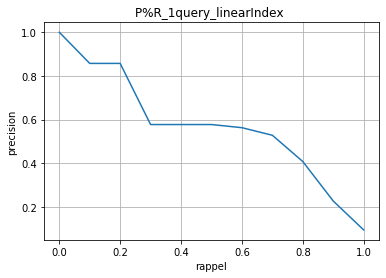

In [202]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
query_id = 5
# Data for plotting
courbePR = linear_evaluator.evaluate_query_pr_points(query_id)
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)
ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_1query_linearIndex ')
ax.grid()
plt.show()

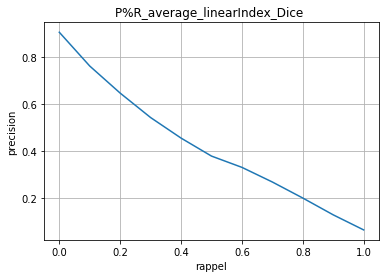

In [220]:
courbePR = linear_evaluator.evaluate_pr_points()
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)

ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_average_linearIndex ')
ax.grid()

#fig.savefig("P%R_average.png")
plt.show()

In [208]:
print('AP(index linéaire)pour la query',query_id,":", linear_evaluator.evaluate_query_ap(query_id))
print("mAP(index linéaire) :",linear_evaluator.evaluate_map())


AP(index linéaire)pour la query 5 : 0.5455433657058841
mAP(index linéaire) : 0.4074243839229491


### Inverted Index 

### En utilisant la recherche par Dice

In [214]:
inverted_evaluator_dice = ir_text.evaluation.ir_evaluation.Evaluator(results_inverted_dice,groundtruth)

#### Courbe P%R 

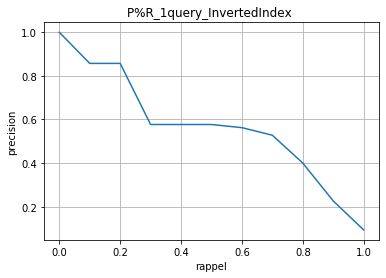

In [215]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
query_id = 5
# Data for plotting
courbePR = inverted_evaluator_dice.evaluate_query_pr_points(query_id)
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)

ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_1query_InvertedIndex_Dice ')
ax.grid()
plt.show()

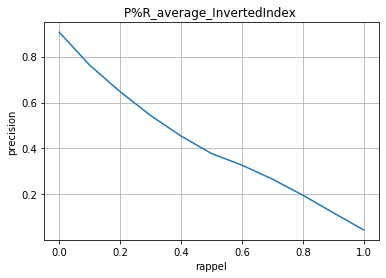

In [216]:
courbePR = inverted_evaluator_dice.evaluate_pr_points()
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)

ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_average_InvertedIndex ')
ax.grid()

plt.show()

In [228]:
print('AP(Inverted Index Dice)pour la query',query_id,":", inverted_evaluator_dice.evaluate_query_ap(query_id))
print("mAP(Inverted Index Dice) :",inverted_evaluator_dice.evaluate_map())

AP(Inverted Index Dice)pour la query 5 : 0.6944351219513206
mAP(Inverted Index Dice) : 0.4585752949254106


### En utilisant la recherche par TF

In [229]:
inverted_evaluator_TF = ir_text.evaluation.ir_evaluation.Evaluator(results_inverted_tf,groundtruth)

#### Courbe P%R 

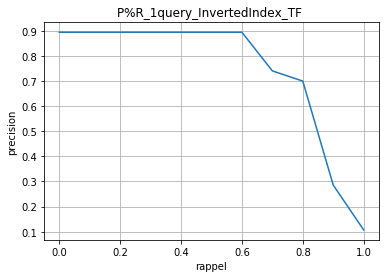

In [230]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
query_id = 5
# Data for plotting
courbePR = inverted_evaluator_TF.evaluate_query_pr_points(query_id)
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)

ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_1query_InvertedIndex_TF ')
ax.grid()
plt.show()

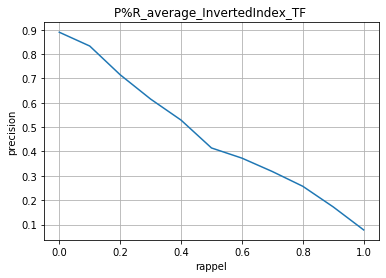

In [231]:
courbePR = inverted_evaluator_TF.evaluate_pr_points()
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)

ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_average_InvertedIndex_TF ')
ax.grid()

plt.show()

In [232]:
print('AP(Inverted Index TF)pour la query',query_id,":", inverted_evaluator_TF.evaluate_query_ap(query_id))
print("mAP(Inverted Index TF) :",inverted_evaluator_TF.evaluate_map())

AP(Inverted Index TF)pour la query 5 : 0.6944351219513206
mAP(Inverted Index TF) : 0.4585752949254106


### En utilisant la recherche par TF + IDF

In [239]:
inverted_evaluator_TFIDF = ir_text.evaluation.ir_evaluation.Evaluator(results_inverted_tfidf,groundtruth)

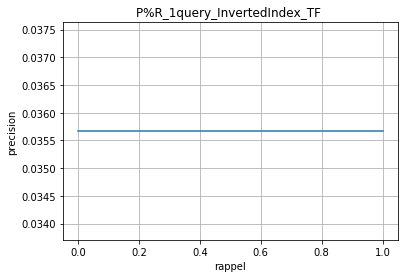

In [240]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
query_id = 5
# Data for plotting
courbePR = inverted_evaluator_TFIDF.evaluate_query_pr_points(query_id)
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)

ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_1query_InvertedIndex_TF+IDF ')
ax.grid()
plt.show()

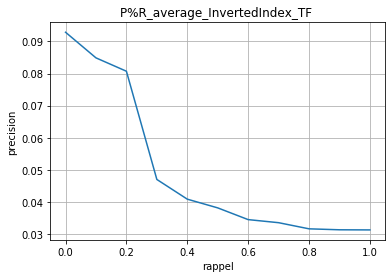

In [241]:
courbePR = inverted_evaluator_TFIDF.evaluate_pr_points()
r =[] 
p =[]
for (recall, precision) in courbePR:
    r.append(recall)
    p.append(precision)
fig, ax = plt.subplots()
ax.plot(r, p)

ax.set(xlabel='rappel', ylabel='precision',
       title='P%R_average_InvertedIndex_TF+IDF ')
ax.grid()

plt.show()

In [242]:
print('AP(TF+IDF)pour la query',query_id,":", inverted_evaluator_TF.evaluate_query_ap(query_id))
print("mAP(TF+IDF) :",inverted_evaluator_TF.evaluate_map())

AP(TF+IDF)pour la query 5 : 0.5103745002427975
mAP(TF+IDF) : 0.5448714484540299
